# PCA and autoencoders

此份 Notebook 主要是參考 李弘毅的 PCA&AutoEncoder 教學影片
連結如下
http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2017/Lecture/PCA.mp4

In [1]:
# Numpy is our primary dependency
import numpy as np

# Import datasets from scikit-learn only to get the iris data set
from sklearn import datasets

# We will need some plotting too
import matplotlib.pyplot as plt


# import seaborn
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

#假設你要讓每一個 chart inline 獨立顯示
%matplotlib inline 

## The Dataset

我們使用 MMinst DataSet 作為練習的資料來洚

### Pre-processing of data

In [2]:
from sklearn import datasets
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np


mnist = datasets.load_digits()
X = mnist.data
y = mnist.target

We will need to pre-process the data in various ways. For PCA, we will need all features to be centered (i.e. with mean zero) and with unit standard deviation.

For the autoencoding section, we will need to make sure that all values are between 0 and 1. We will need these data in transposed form as well.

In [3]:
# 他是一個 28*28 影像矩陣
X[0]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

這個數字 #5#


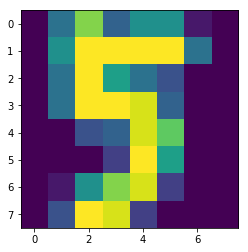

In [4]:
print("這個數字 #{}#".format(y[33]))
plt.imshow(X[33].reshape(8,8), interpolation='nearest')
plt.show()

## PCA 核心研究算法
* 因為是要進行 Feature Dimession Reduction，所以先計算各feature間 distribution 的covariance，故先產出 covariance matrix
* 接下對 cov matrix ，求出 eigen_value 及 eigen_vector
* 再來看 eigen_value 遞減佔比


In [5]:
mean = np.mean(X,axis=0)
x_x = X-mean

In [6]:
cov = np.matmul(x_x.transpose(),x_x)/mean.shape[0]

In [7]:
value,vec = np.linalg.eig(cov)

In [18]:
value.shape

(64,)

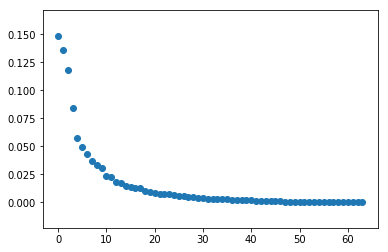

In [19]:
# 再來看 eigen_value 遞減佔比

y_eigen_value = []
for i in range(8*8):
    y_eigen_value.append(value[i]/np.sum(value))

plt.scatter(range(0,8*8), y_eigen_value , cmap=plt.cm.spectral)
plt.show()

In [20]:
# 因為 PCA 產出的值為負到正的浮點數，故需先作平移，才能視覺化成現
new_vec = ((vec+1)*128).astype(int)

In [21]:
# 來看一下 componet

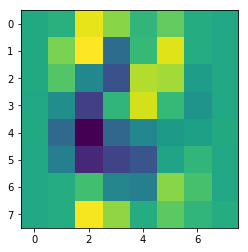

In [22]:
plt.imshow(new_vec[:,0].reshape(8,8), interpolation='nearest')

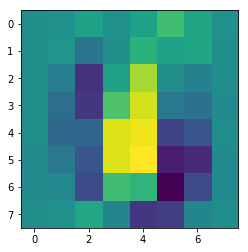

In [23]:
plt.imshow(new_vec[:,1].reshape(8,8), interpolation='nearest')

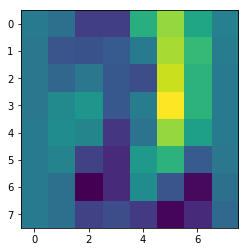

In [24]:
plt.imshow(new_vec[:,2].reshape(8,8), interpolation='nearest')

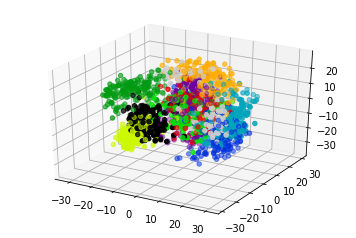

In [25]:
# new_X 為降為過後
new_X = np.matmul(X,vec[:,:3])
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(new_X[:, 0], new_X[:, 1], new_X[:, 2], c=y, cmap=plt.cm.spectral)
plt.show()

In [29]:
# 將投影的結果，進行 Normalize ，以便好計算兩
from sklearn.preprocessing import normalize
new_X_normlized = normalize(new_X)

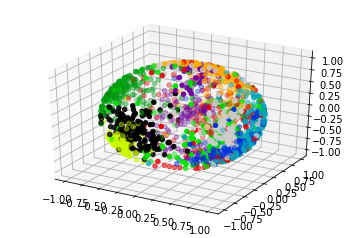

In [27]:
fig2 = plt.figure()
ax2 = fig2.gca(projection='3d')
ax2.scatter(new_X_normlized[:, 0], new_X_normlized[:, 1], new_X_normlized[:, 2], c=y, cmap=plt.cm.spectral)
plt.show()

這個數字 #2#


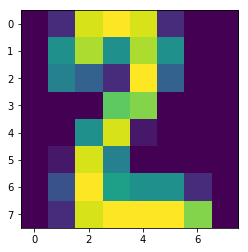

這個數字 #2#


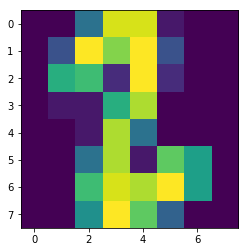

這個數字 #2#


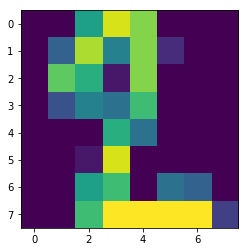

這個數字 #2#


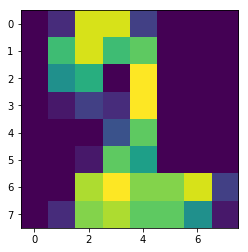

這個數字 #2#


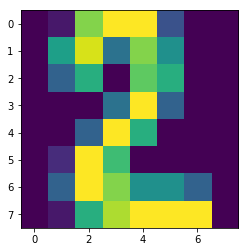

這個數字 #2#


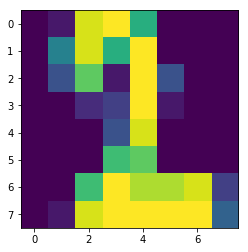

這個數字 #2#


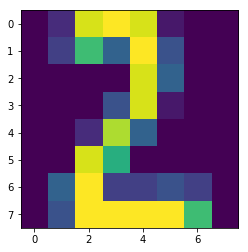

這個數字 #2#


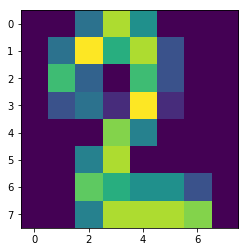

這個數字 #8#


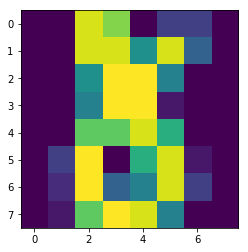

這個數字 #2#


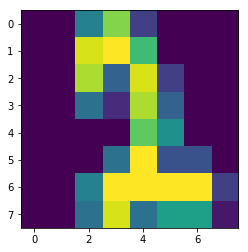

這個數字 #2#


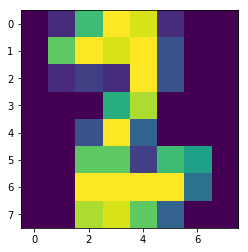

這個數字 #8#


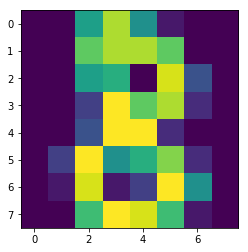

這個數字 #8#


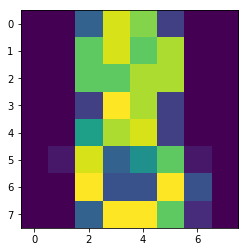

這個數字 #8#


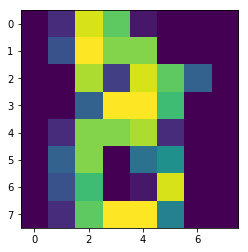

這個數字 #2#


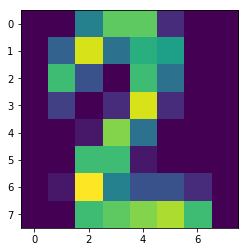

這個數字 #2#


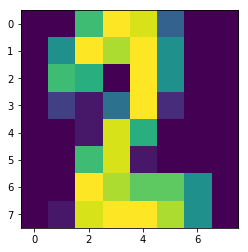

這個數字 #2#


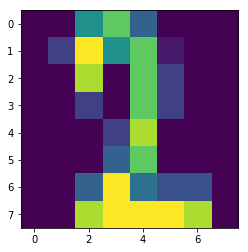

這個數字 #2#


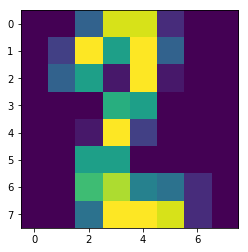

這個數字 #2#


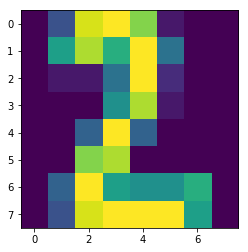

這個數字 #1#


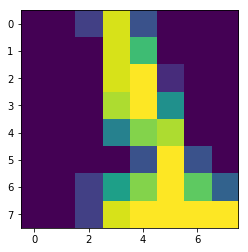

這個數字 #8#


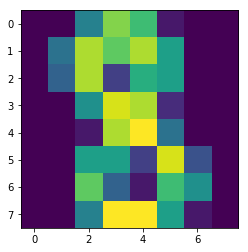

這個數字 #2#


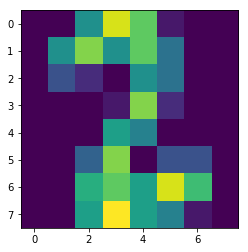

這個數字 #2#


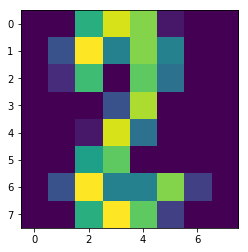

這個數字 #2#


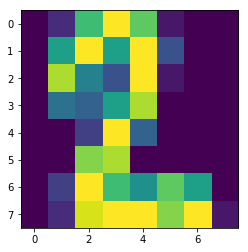

這個數字 #2#


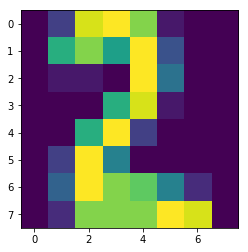

這個數字 #3#


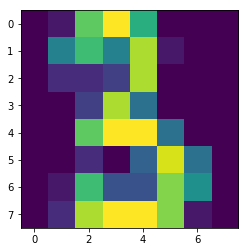

這個數字 #2#


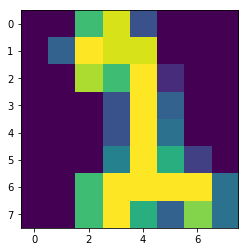

這個數字 #2#


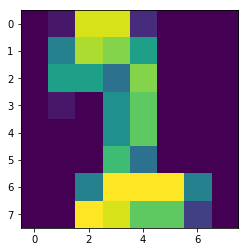

這個數字 #2#


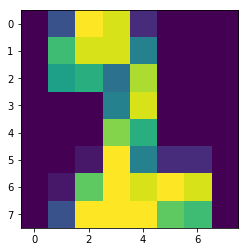

這個數字 #2#


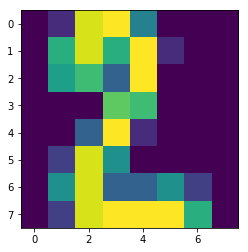

In [88]:
# 計算看看 similarity

test_index = 333
new_X_normlized

sims = np.matmul(new_X_normlized,new_X_normlized[test_index])

for i in sims.argsort()[-30:][::-1]:
    print("這個數字 #{}#".format(y[i]))
    plt.imshow(X[i].reshape(8,8), interpolation='nearest')
    plt.show()



## 使用現成的套件看看跟我自已算的是否有一樣

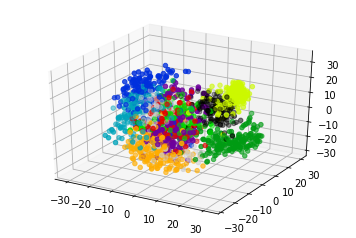

In [28]:
pca = decomposition.PCA(n_components=3)
new_X = pca.fit_transform(X)

fig3 = plt.figure()
ax = fig3.gca(projection='3d')
ax.scatter(new_X[:, 0], new_X[:, 1], new_X[:, 2], c=y, cmap=plt.cm.spectral)
plt.show()

## Autoencoders

PCA is an example of an *autoencoder*.

An autoencoder consists of two parts: A *coder* and a *decoder*. The coder transforms the origin data points into a feature space of lower dimension than the original dataset. The decoder then transforms from the low dimension space back into the origin set of dimensions. The aim is for the decoder to get as close to the original data as possible.

When the coder and decoder are *linear transformations*, the resulting optimal autoencoder is equivalent to PCA.

But what if we add non-linearities? The situation is similar to adding an activation function to a neural net, and indeed that is what we will do here. The resulting neural net is shown in the figure below. This has a minimum number of layers.

![Structure of a shallow neural net autoencoder](autoencoder.png)

## The neural net model

But we could add several additional layers in the coder and decoder. In this case we get a *deep autoencoder*. Here, we will make each two layers deep, such that:

- The coder transforms from 4 to 3 to 2 dimensions.
- The decoder transforms from 2 to 3 to 4 dimensions.

I.e. our model will be the one depicted below:

![The autoencoder model we will use](deep_autoencoder.png)

### Activation functions

We will use a number of activation functions to study their differences. Each function will return the activation values as well as the derivatives.

In [190]:
# No activation function
def linear(x):
    linear_grad = np.ones(x.shape)
    return x, linear_grad

# Sigmoid
def sigmoid(x):
    sigmoid = 1 / (1 + np.exp(-x))
    sigmoid_grad = sigmoid * (1 - sigmoid)
    return sigmoid, sigmoid_grad

# ReLU
def relu(x):
    relu = np.maximum(x, np.zeros(x.shape))
    relu_grad = np.ones(x.shape) * (x > 0)
    return relu, relu_grad

### Neural network math

We will represent our neural network as a list of dictionaries, each corresponding to a layer of neurons:

In [78]:
# Make a new layer
def new_layer(dim_in, dim_out):
    weights = np.random.rand(dim_out, dim_in) - 0.5
    bias = np.random.rand(dim_out, 1) - 0.5
    
    return {
        'weights': weights,
        'bias': bias,
        'activations': np.zeros((dim_out, AEdata.shape[1])),
        'act_grad': np.zeros((dim_out, AEdata.shape[1])),
        'errors': np.zeros((dim_out, AEdata.shape[1])),
        'weights_grad': np.zeros(weights.shape),
        'bias_grad': np.zeros(bias.shape)
    }

# Our specific models hyperparameters
def initialize_model():
    return [new_layer(4, 3), new_layer(3, 2), new_layer(2, 3), new_layer(3, 4)]

We need to be able to forward propagate values ...

In [169]:
def forward_propagate(layers, inputs, activation_function):
    for layer in layers:
        zs = np.matmul(layer['weights'], inputs) + layer['bias']
        activations, act_grad = activation_function(zs)
        layer['activations'] = activations
        layer['act_grad'] = act_grad
        inputs = activations

... and backpropagate values:

In [170]:
def backward_propagate(layers, inputs, outputs):    
    # Initiate errors for the last layer (normalized)
    errors = (layers[-1]['activations'] - outputs)
    
    # Go backwards through the layers
    for layer_number, layer in reversed(list(enumerate(layers))):
        layer['errors'] = errors
        
        # Calculate Hadamard product between errors and activation gradients
        hadamard = errors * layer['act_grad']
        
        # Get activations of previous layer - if at the first layer use input
        if layer_number == 0:
            last_activations = inputs
        else:
            last_activations = layers[layer_number - 1]['activations']
        
        # Calculate derivatives of weights
        weights_grad = np.matmul(hadamard, last_activations.transpose()) / inputs.shape[1]
        layer['weights_grad'] = weights_grad
        
        # Calculate derivatives of biases
        bias_grad = hadamard.sum(axis=1).reshape(layer['bias'].shape) / inputs.shape[1]
        layer['bias_grad'] = bias_grad
        
        # Backpropagate errors, unless we're at the first layer
        if layer_number != 0:
            errors = np.matmul(layer['weights'].transpose(), hadamard)

And we need to be able to update weights and biases based on the results of the backpropagation:

In [171]:
def gradient_descent(layers, learning_rate):
    for layer in layers:
        layer['weights'] = layer['weights'] - layer['weights_grad'] * learning_rate
        layer['bias'] = layer['bias'] - layer['bias_grad'] * learning_rate

Finally, we need the value of the error function to visualize training:

In [172]:
def error_function(layers):
    errors = layers[-1]['errors']
    e_squared = errors ** 2
    return e_squared.sum() / errors.shape[1]

## Training the autoencoder

The following function will initialize and train our autoencoder:

In [178]:
def trainAE(activation_function, learning_rate, epochs):
    # Initialize model
    layers = initialize_model()
    
    # Array of errors
    error_history = []
    
    # Run through the epochs
    for epoch in range(epochs):
        forward_propagate(layers, AEdata, activation_function)
        backward_propagate(layers, AEdata, AEdata)
        gradient_descent(layers, learning_rate)
        error_history.append(error_function(layers))
    
    # Return trained model, and error_history for plotting
    return layers, error_history

### Linear autoencoder

First, let's train a linear autoencoder.

The error history is plotted below.

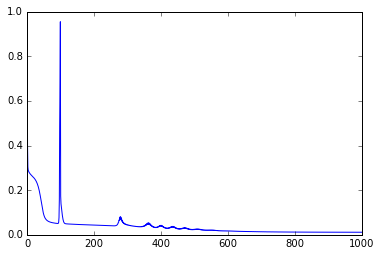

In [193]:
layers, error_history = trainAE(linear, .4, 1000)

# Plot error history
plt.plot(range(1000), error_history)
plt.show()

Let's look at the encoded coordinates:

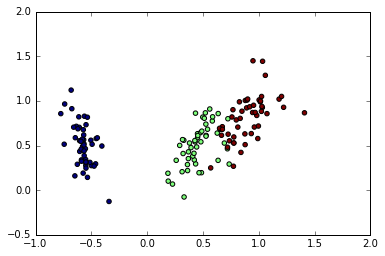

In [194]:
# Get encoded coordinates
ec1 = np.array(layers[1]['activations'][0, :].transpose())
ec2 = np.array(layers[1]['activations'][1, :].transpose())

# Plot encoded data
plt.scatter(ec1, ec2, c=labels)
plt.show()

Since a linear autoencoder is equivalent to PCA, it is not surprising, that this looks similar (but may be rotated/inverted).

### Sigmoid autoencoder

Same procedure for the sigmoid activation function:

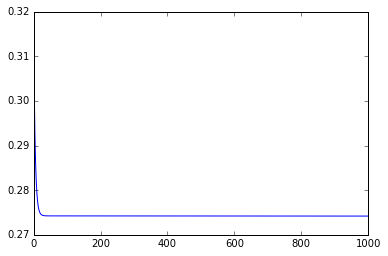

In [203]:
layers, error_history = trainAE(sigmoid, 1, 1000)

# Plot error history
plt.plot(range(1000), error_history)
plt.show()

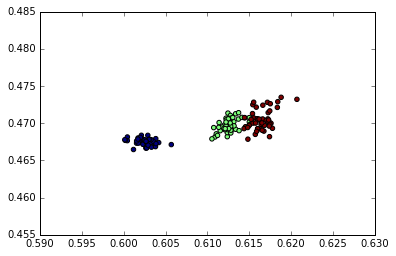

In [204]:
# Get encoded coordinates
ec1 = np.array(layers[1]['activations'][0, :].transpose())
ec2 = np.array(layers[1]['activations'][1, :].transpose())

# Plot encoded data
plt.scatter(ec1, ec2, c=labels)
plt.show()

Perhaps somewhat surprisingly, this generally seems to perform a bit worse than the linear autoencoder.

### ReLU autoencoder

And finally the ReLU activation function:

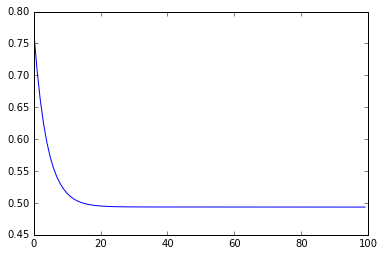

In [220]:
layers, error_history = trainAE(relu, .1, 100)

# Plot error history
plt.plot(range(100), error_history)
plt.show()

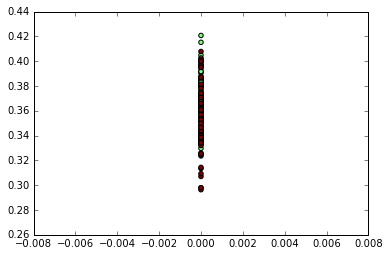

In [221]:
# Get encoded coordinates
ec1 = np.array(layers[1]['activations'][0, :].transpose())
ec2 = np.array(layers[1]['activations'][1, :].transpose())

# Plot encoded data
plt.scatter(ec1, ec2, c=labels)
plt.show()

This has a tendency to squash the dimensions :-/ So probably not a good pick.